# Double pendulum

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import sin, cos
from scipy.integrate import solve_ivp

### Equations of motion

Symmetric double pendulum

$$
\mathcal{L} = \dot{\theta_1}^2 + \dfrac{1}{2}\dot{\theta_2}^2 + \dot{\theta_1}\dot{\theta_2}\cos(\theta_1 - \theta_2) + 2\cos\theta_1 + \cos\theta_2
$$

$$
\begin{cases}
& \ddot{\theta_1} & = & \dfrac{
\phantom{2}\sin\theta_2\cos(\theta_1 - \theta_2) -
2\sin\theta_1 -
\sin(\theta_1 - \theta_2)
\Big[ \phantom{2}\dot{\theta_2}^2 + \cos(\theta_1 - \theta_2)\dot{\theta_1}^2 \Big]
}{2 - \cos^2(\theta_1 - \theta_2)} & \\
& \ddot{\theta_2} & = & \dfrac{
2\sin\theta_1\cos(\theta_1 - \theta_2) -
2\sin\theta_2 +
\sin(\theta_1 - \theta_2)
\Big[ 2\dot{\theta_1}^2 + \cos(\theta_1 - \theta_2)\dot{\theta_2}^2 \Big]
}{2 - \cos^2(\theta_1 - \theta_2)}
\end{cases}
$$

In [2]:
def dfunc(t, x):
    theta_1 = x[0]
    theta_2 = x[1]
    u_1 = x[2]   # \dot{\theta_1}
    u_2 = x[3]   # \dot{\theta_2}
    sdiff = sin(theta_1 - theta_2)
    cdiff = cos(theta_1 - theta_2)
    detM = 2 - cdiff**2
 
    res = np.zeros_like(x)
    res[0] = u_1
    res[1] = u_2
    res[2] = (sin(theta_2)*cdiff - 2*sin(theta_1) - sdiff*(u_2**2 + cdiff*u_1**2)) / detM
    res[3] = (2*sin(theta_1)*cdiff -2*sin(theta_2) + sdiff*(2*u_1**2 + cdiff*u_2**2)) / detM
    return res

### Constant of motion

In [3]:
def energy(x):
    theta_1, theta_2, u_1, u_2 = x
    return u_1**2 + (1/2)*u_2**2 + u_1*u_2*cos(theta_1 - theta_2) + 3 - 2*cos(theta_1) - cos(theta_2)

### Initial conditions

In [4]:
theta_1 = np.radians(0)
theta_2 = np.radians(90)
u_1 = 0
u_2 = 0

### Time scale

In [5]:
t_max = 2*192.0
dt = 0.02
t = np.arange(0, t_max, dt)

E_0 = energy([theta_1, theta_2, u_1, u_2])
annotation = "E = {}".format(E_0.round(4))
print(annotation)

E = 1.0


### Numerical solution

In [6]:
sol = solve_ivp(dfunc, t[[0, -1]], [theta_1, theta_2, u_1, u_2], method="DOP853", t_eval=t, rtol=1e-10, atol=1e-10)

### Orbit

Text(-1.0814550917631824, 1.3024580032051838, 'E = 1.0')

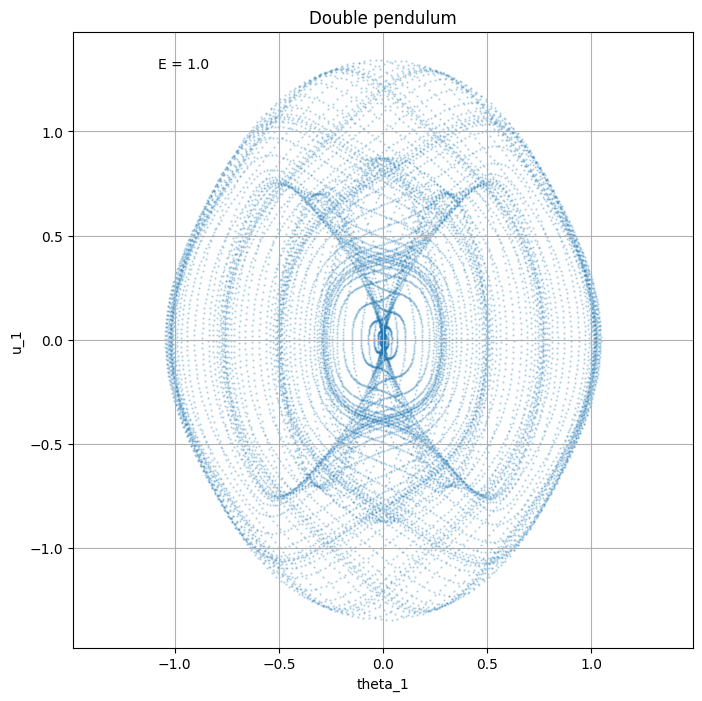

In [8]:
plt.figure(figsize=(8, 8))
plt.axis()
plt.title("Double pendulum")
plt.axis("equal")
plt.xlabel("theta_1")
plt.ylabel("u_1")
plt.grid(True)
plt.scatter(sol.y[0], sol.y[2], s=0.5, alpha=0.25)
xmin, xmax, ymin, ymax = plt.axis()
plt.text(xmin + 0.03*(xmax - xmin), ymax - 0.06*(ymax - ymin), annotation)